In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import subprocess

In [2]:
ROOT = Path('/export/home/user/work/virus_search/26_07_23')
RES_D_V = ROOT / 'data' / 'all_samples' / '16' / 'deepac_vir'
RES_D_V_F = ROOT / 'data' / 'all_samples' / '16' / 'dvf'

## Checking the adequacy of dvf (sample 16_N)

In [ ]:
to_save = ROOT / 'data' / 'all_samples' / '16' / 'dvf'
for path in (ROOT / 'data' / 'all_samples' / '16').glob("*.fasta"): #bact, euk and vir from 16_N (by Diamond)
    print(path.name)
    command = f"python /export/home/user/work/virus_search/programs/DeepVirFinder/dvf.py -i {path} -o {to_save} -c 10 "
    print(f"\t{command}")
    subprocess.run(command, shell=True, check=True)  

In [3]:
res_d_v_f = {path.name.split(".")[0]:np.where(pd.read_csv(path, sep='\t')['score'] > 0.5, 1, 0) for path in RES_D_V_F.glob("*.fasta*")}

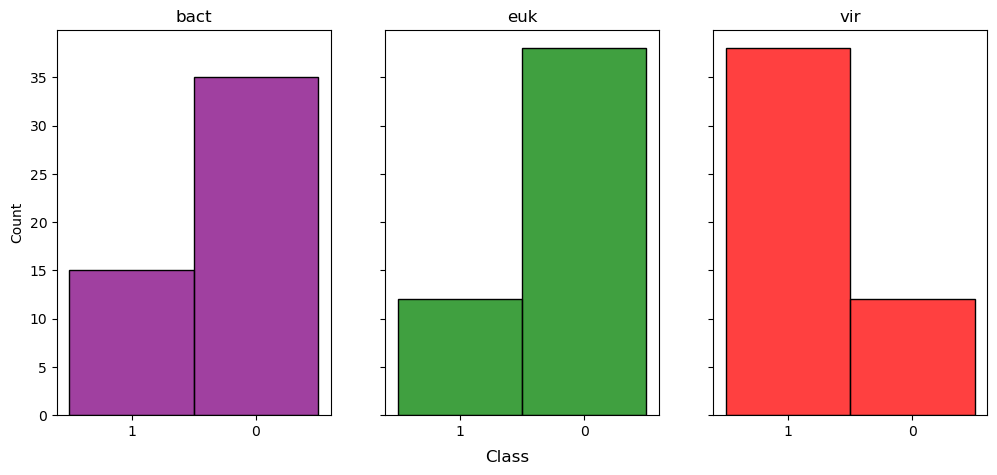

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

sns.histplot([str(i) for i in res_d_v_f['bact']], legend=False, color='purple', ax=axes[0])
axes[0].set_title('bact')
sns.histplot([str(i) for i in res_d_v_f['euk']], legend=False, color='green', ax=axes[1])
axes[1].set_title('euk')
sns.histplot([str(i) for i in res_d_v_f['vir']], legend=False, color='red', ax=axes[2])
axes[2].set_title('vir')
fig.supxlabel("Class")
fig.savefig(f"{ROOT}/dvf/Presence of a virus (16_N).png")
plt.show()

# Proportion of presumably viral reads in the samples (contigs unclassified by Diamond)

In [ ]:
to_save = ROOT / 'dvf' / 'unclassified'
for path in (ROOT / 'data' / 'unclassified').glob("Nnoctula*"):
    print(path.name)
    command = f"python /export/home/user/work/virus_search/programs/DeepVirFinder/dvf.py -i {path} -o {to_save} -c 10 "
    print(f"\t{command}")
    subprocess.run(command, shell=True, check=True)  

In [5]:
to_txt = ROOT / "dvf" / "unclassified"

In [6]:
res_d_v_f = {"".join(path.name.split(" ")[:2]):np.where(pd.read_csv(path, sep='\t')['score'] > 0.5, 1, 0) for path in to_txt.glob("*.txt*")}

In [7]:
numbers_in_classes = [(i, np.bincount(res_d_v_f[i])) for i in res_d_v_f]

In [8]:
df_d_v_fpd = pd.DataFrame({"sample"   :[i[0] for i in numbers_in_classes],
              "virus"    :[i[1][1] * 100 / i[1].sum() for i in numbers_in_classes], 
              "non virus":[i[1][0] * 100 / i[1].sum() for i in numbers_in_classes]
             })

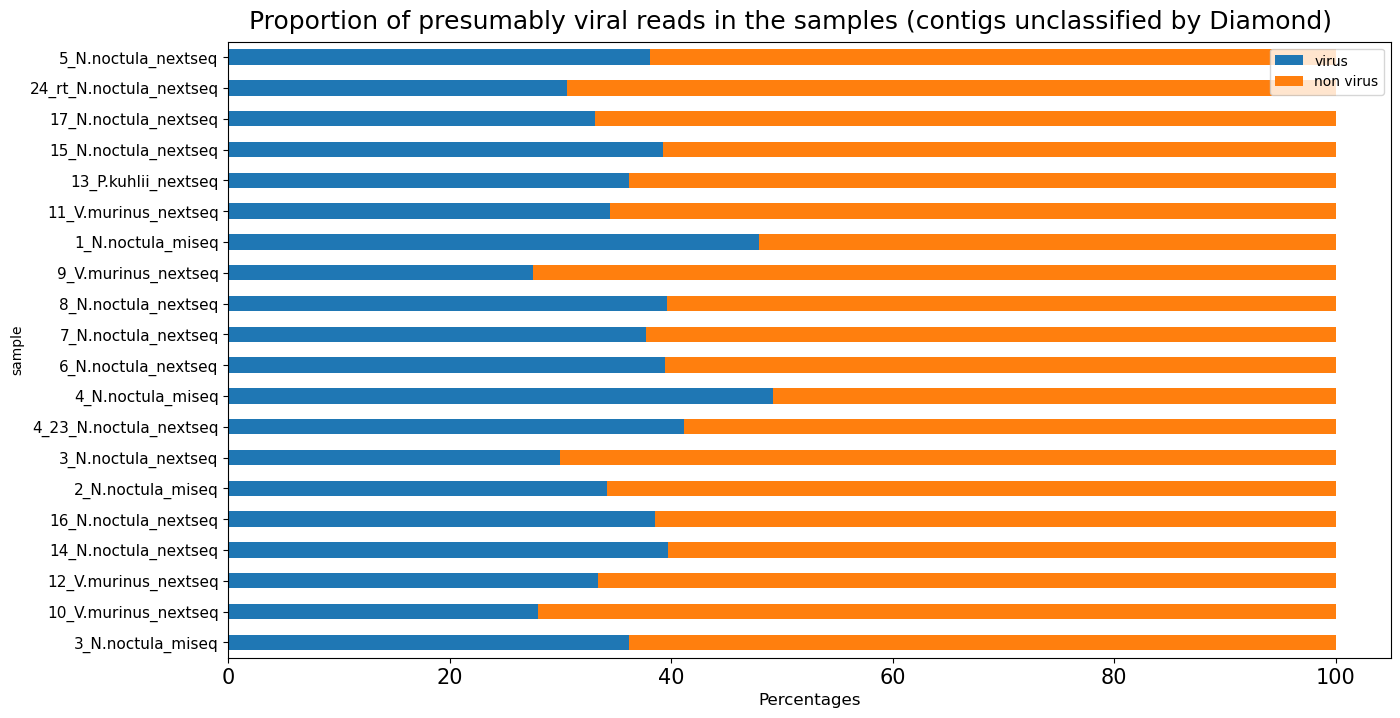

In [9]:
ax = df_d_v_fpd.plot(
    x='sample',
    kind='barh',
    stacked=True,
    figsize=(15,8),
    mark_right = True,
)
fig = ax.get_figure()
fig.suptitle('Proportion of presumably viral reads in the samples (contigs unclassified by Diamond)', fontsize=18, y=0.92)
plt.xlabel('Percentages', fontsize=12)
plt.xticks(size=15)
plt.yticks(size=11)
fig.savefig(f"{ROOT}/dvf/Presence of a virus (contigs unclassified by Diamond).png")